In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [5]:
data = pd.read_csv('column_2C_weka.csv')
data.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
df = data.iloc[:, [5, 4]]
df.head(5)

,degree_spondylolisthesis,pelvic_radius
0,-0.254400,98.672917
1,4.564259,114.405425
2,-3.530317,105.985135
3,11.211523,101.868495
4,7.918501,108.168725


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [8]:
lbls = kmeans.predict(df)

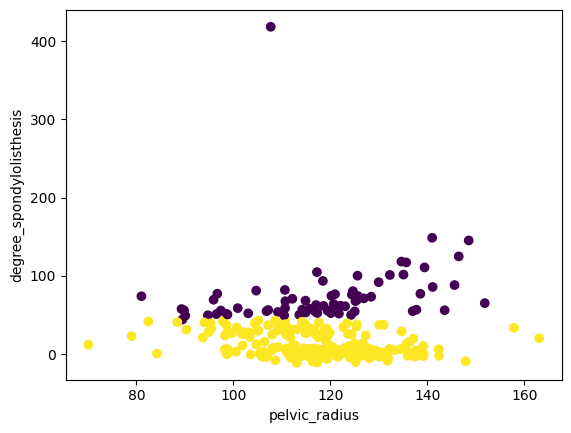

In [9]:
plt.scatter(df['pelvic_radius'], df['degree_spondylolisthesis'], c = lbls)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [12]:
df1 = pd.DataFrame({'labels': lbls, 'class':data['class']})
crtb = pd.crosstab(df1['labels'], df1['class'])
crtb

class,Abnormal,Normal
labels,,
0,72,0
1,138,100


In [14]:
inertia_list = np.empty(9)
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    inertia_list[i] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

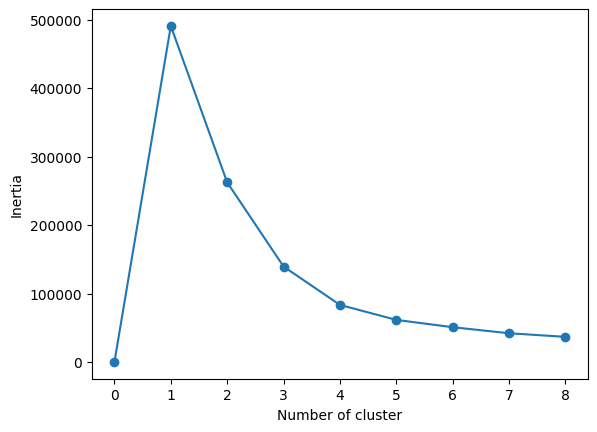

In [15]:
plt.plot(range(0, 9), inertia_list, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [17]:
data_2 = pd.read_csv('column_2C_weka.csv')
data_2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [23]:
data_3 = data_2.drop('class', axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [24]:
sc = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(sc, kmeans)
pipe.fit(data_3)
lbls_2 = pipe.predict(data_3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
df3 = pd.DataFrame({'labels' : lbls_2, 'class' : data_2['class']})
ct3 = pd.crosstab(df3['labels'], df3['class'])

In [26]:
ct3

class,Abnormal,Normal
labels,,
0,116,10
1,94,90


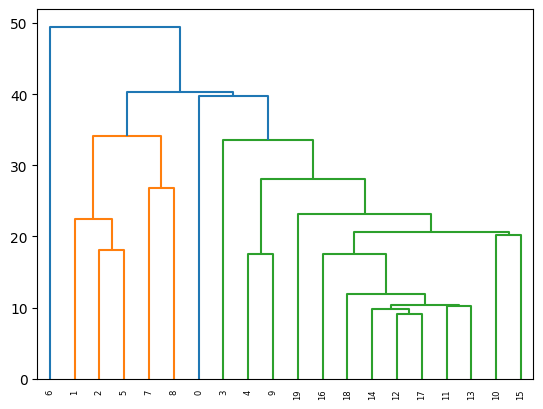

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data_3.iloc[200 : 220, : ], method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()